In [1]:
import string
from tqdm import tqdm
import transformers
import pandas as pd
import metrics
import json
import seaborn
import spacy
nlp = spacy.load("en_core_web_lg")

In [2]:
s1_list = []
s2_list = []
source_lengths = []
target_lengths = []
split = "train"

In [4]:
tokenizer = transformers.AutoTokenizer.from_pretrained("t5-large")

def get_len(text):
    return len(tokenizer.encode(text))

def create_pair(s, t):
    line = {
        "translation": {
            "en": s,
            "pa": t
        }
    }
    source_lengths.append(get_len(s))
    target_lengths.append(get_len(t))
    with open("./"+split+"lines.json", 'a+') as outfile:
        json.dump(line, outfile)
        outfile.write("\n")
    line = {
        "translation": {
            "en": t,
            "pa": s
        }
    }
    with open("./"+split+"lines.json", 'a+') as outfile:
        json.dump(line, outfile)
        outfile.write("\n")

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

# MRPC

In [5]:
df_train = pd.read_csv("./mrpc/mrpc_"+split+".csv")
df = df_train[df_train["label"]==1]
print(df.shape)
df.head()

(2753, 4)


,Unnamed: 0,s1,s2,label
0,0,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi...",1
2,2,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an...",1
4,4,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...,1
5,5,Revenue in the first quarter of the year dropp...,With the scandal hanging over Stewart's compan...,1
7,7,The DVD-CCA then appealed to the state Supreme...,The DVD CCA appealed that decision to the U.S....,1


In [6]:
for index, row in df.iterrows():
    s1, s2 = row["s1"], row["s2"]
    s1 = metrics.preprocess_text(s1)
    s2 = metrics.preprocess_text(s2)
    s1_list.append(s1)
    s2_list.append(s2)

# PAWS

In [7]:
if split=="train":
    df_train = pd.read_csv("./paws/train.tsv", sep="\t")
    df_train = df_train[df_train["label"]==1]
    df_dev = pd.read_csv("./paws/dev.tsv", sep="\t")
    df_dev = df_dev[df_dev["label"]==1]
    df = pd.concat([df_train, df_dev])
else:
    df_dev = pd.read_csv("./paws/test.tsv", sep="\t")
    df = df_dev[df_dev["label"]==1]
print(df.shape)
df.head()

(25368, 4)


,id,sentence1,sentence2,label
1,2,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...,1
3,4,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...,1
4,5,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...,1
5,6,William Henry Henry Harman was born on 17 Febr...,"William Henry Harman was born in Waynesboro , ...",1
7,8,With a discrete amount of probabilities Formul...,Given a discrete set of probabilities formula ...,1


In [8]:
for index, row in df.iterrows():
    s1 = metrics.preprocess_text(row["sentence1"])
    s2 = metrics.preprocess_text(row["sentence2"])
    s1_list.append(s1)
    s2_list.append(s2)

## Output

In [9]:
for s, t in tqdm(zip(s1_list, s2_list), total=len(s1_list)):
    s, t = nlp(s), nlp(t)
    wpd = metrics.wpd(s, t)
    if wpd > 0.2:
        create_pair(str(s), str(t))

100%|██████████| 28121/28121 [03:43<00:00, 125.75it/s]


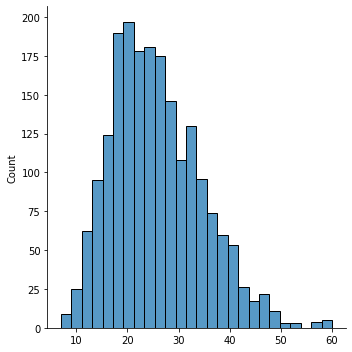

In [10]:
seaborn.displot(source_lengths)

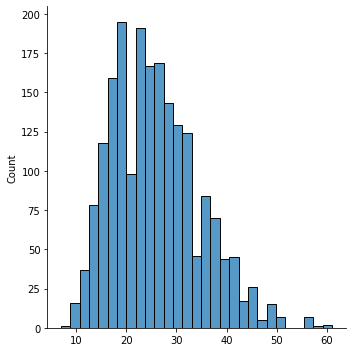

In [11]:
seaborn.displot(target_lengths)